# THESE ALGORITHM HAS NOT BEEN IMPLEMENTED !
### You can find some experiments done to get it working here.

In [ ]:
import numpy as np
import plots
from Generators.NBL_Diracs import NBL_Diracs
from Samplers.IAF_FRI import IAF_FRI

In [2]:
dur = 8

dt = 0.01

B = 1

K = 1

w_0 = 0.01

k_pi = 0

L_support = 2 * (1 + k_pi * np.pi / w_0)
N_E_spline = int(L_support / dt)

K_channels = 1

In [3]:
nbl_diracs = NBL_Diracs(dur, dt, L_support, B, K)
t, u = nbl_diracs.generate()

In [4]:
threshold = 0.12

In [5]:
iaf_fri = IAF_FRI(threshold, w_0, k_pi, K_channels)

iaf_fri.setSignal(t, u, dt)

spikes = iaf_fri.encode()

# u_rec = iaf_fri.decode()

iaf_fri.summary()

Integrate-and-Fire Sampler - FRI
From "TIME ENCODING AND PERFECT RECOVERY OF NON-BANDLIMITED SIGNALS WITH AN INTEGRATE-AND-FIRE SYSTEM"
Roxana Alexandru, Pier Luigi Dragotti, 2019
Status: ENCODED
Parameters:
Frequency 'w_0': 0.01
Number of pis 'k_pi': 0
Number of channels 'K_channels': 1
Support of E-spline filter 'L_support': 2.0


/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


/home/ghassenk/Bureau/EPFL/Master2/Semester Project - ICNS/plots.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, u)


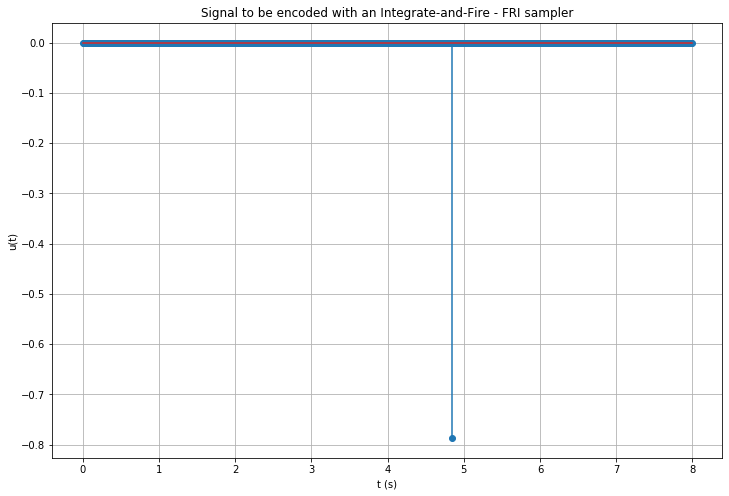

In [6]:
iaf_fri.plotSignal()

In [7]:
# iaf_fri.plotRecoveredSignal()

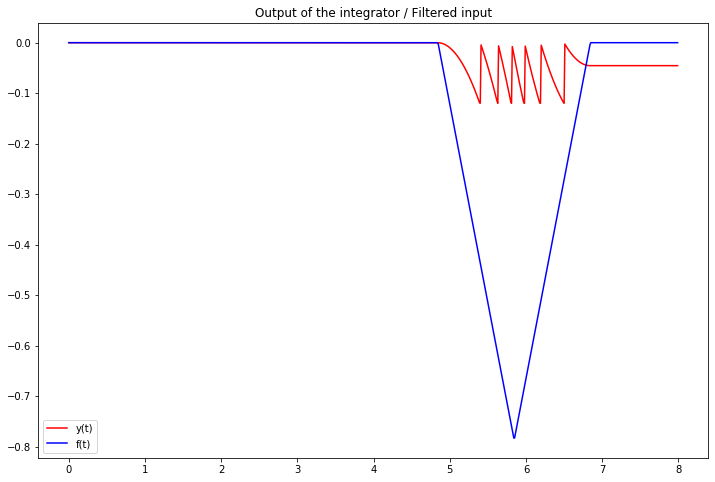

In [8]:
iaf_fri.plotIntegralAndEncoderOutput()

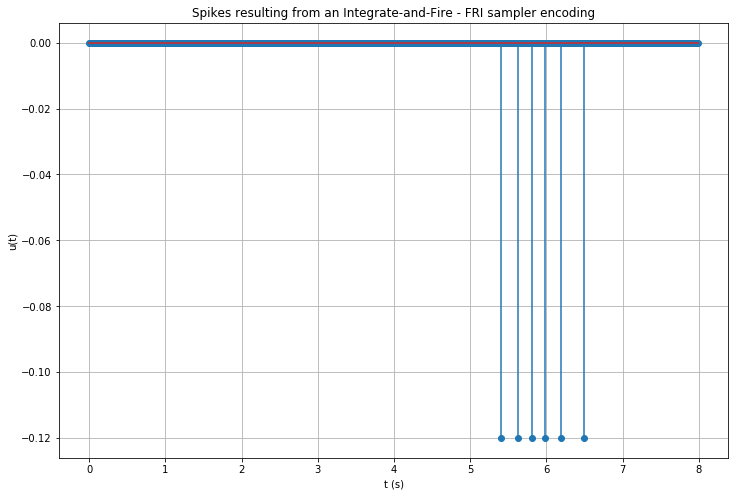

In [9]:
iaf_fri.plotSpikes()

In [10]:
iaf_fri.spikes_idx

array([540, 563, 581, 598, 619, 650])

In [20]:
t0 = iaf_fri.spikes_timings[0]
t1 = iaf_fri.spikes_timings[1]
t2 = iaf_fri.spikes_timings[2]

d1 = t2 - L_support
d2 = t1 - L_support/2

alpha_0 = 1j * w_0
alpha_1 = - alpha_0

phi_1_left = (np.exp(alpha_0 * t1) - np.exp(alpha_0 * t0)) / (alpha_0 * (alpha_0 - alpha_1))
phi_1_right = (np.exp(alpha_1 * t1) - np.exp(alpha_1 * t0)) / (alpha_1 * (alpha_1 - alpha_0))

phi_2_left = (np.exp(alpha_0 * t2) - np.exp(alpha_0 * t1)) / (alpha_0 * (alpha_0 - alpha_1))
phi_2_right = (np.exp(alpha_1 * t2) - np.exp(alpha_1 * t1)) / (alpha_1 * (alpha_1 - alpha_0))

phi_1 = lambda d : phi_1_left * np.exp(- alpha_0 * d) + phi_1_right * np.exp(- alpha_1 * d)
phi_2 = lambda d : phi_2_left * np.exp(- alpha_0 * d) + phi_2_right * np.exp(- alpha_1 * d)

c_0_1 = (np.exp(- alpha_0 * d2) * phi_2(d1) - np.exp(- alpha_0 * d1)) / (phi_1(d2) * phi_2(d1) - phi_1(d1))
c_0_2 = (np.exp(- alpha_0 * d1) - c_0_1 * phi_2(d2)) / (phi_2(d1))

c_1_1 = (np.exp(- alpha_1 * d2) * phi_2(d1) - np.exp(- alpha_1 * d1)) / (phi_1(d2) * phi_2(d1) - phi_1(d1))
c_1_2 = (np.exp(- alpha_1 * d1) - c_0_1 * phi_2(d2)) / (phi_2(d1))

In [21]:
phi_1(d1)

(0.39213091401253164+0j)

In [22]:
phi_1(d2)

(0.2035472980538371+0j)

In [23]:
phi_2(d1)

(0.3437790503581105+0j)

In [24]:
phi_2(d2)

(0.19619608844960224+0j)

In [25]:
print(t0)
print(t1)
print(t2)
print(w_0)

5.4
5.63
5.8100000000000005
0.01


In [26]:
print(c_0_1)
print(c_0_2)

print(c_1_1)
print(c_1_2)

(2.0358597196097676-0.0688471594561193j)
(1.744860742823551-0.07150883549692498j)
(2.0358597196097676+0.0688471594561193j)
(1.744860742823551+0.1500915377999653j)


In [27]:
s_0 = (c_0_1 + c_0_2) * threshold
s_1 = (c_1_1 + c_1_2) * threshold

print(s_0)
print(s_1)

(0.45368645549199826-0.016842719394365314j)
(0.45368645549199826+0.026272643670730154j)


In [28]:
tau_1 = np.log(s_0/s_1) / (alpha_0 - alpha_1)
x_1 = s_0 / np.exp(alpha_0 * tau_1)

print(tau_1)
print(x_1)

(-4.7475874643728835+0.04926545700505628j)
(0.45419828649472677+0.004709648899733994j)


In [29]:
# from numpy import exp
# from numpy.linalg import solve

# A = np.zeros((2, 2), complex)

# A[0, 0] = exp(alpha_0*t1)- exp(alpha_0*t0)
# A[0, 1] = exp(alpha_0*t2)- exp(alpha_0*t1)
# A[1, 0] = exp(alpha_1*t1)- exp(alpha_1*t0)
# A[1, 1] = exp(alpha_1*t2)- exp(alpha_1*t1)

# A = A *(1/(alpha_0*(alpha_0-alpha_1)))

# B0 = np.array([1, 0])
# B1 = np.array([0, 1])

# c_0 = solve(A, B0)
# c_1 = solve(A, B1)

# c_0_1 = c_0[0]
# c_0_2 = c_0[1]

# c_1_1 = c_1[0]
# c_1_2 = c_1[1]

In [30]:
# print(A)

[[0.63390341-11.48251315j 0.51451925 -8.98527952j]
 [0.63390341+11.48251315j 0.51451925 +8.98527952j]]


In [31]:
# print(c_0_1)
# print(c_0_2)

# print(c_1_1)
# print(c_1_2)

(-21.17424062157182+1.2124892089781494j)
(27.059091010818307-1.493823675868283j)
(-21.174240621571876-1.2124892089771695j)
(27.059091010818378+1.4938236758670311j)


In [32]:
# s_0 = (c_0_1 + c_0_2) * threshold
# s_1 = (c_1_1 + c_1_2) * threshold

# print(s_0)
# print(s_1)

(0.7061820467095785-0.03376013602681604j)
(0.7061820467095802+0.0337601360267834j)


In [33]:
# tau_1 = np.log(s_0/s_1) / (alpha_0 - alpha_1)
# x_1 = s_0 / np.exp(alpha_0 * tau_1)

# print(tau_1)
# print(x_1)

(-4.777019206969872+1.084436025923574e-14j)
(0.7069885641787133-1.6350177483675625e-14j)


In [34]:
# iaf_fri.plotSignalAndSpikes()

In [35]:
# iaf_fri.plotRecoveredSignalAndSpikes()

In [36]:
# iaf_fri.plotSignalAndRecoveredSignal()

In [37]:
# iaf_fri.plotError()

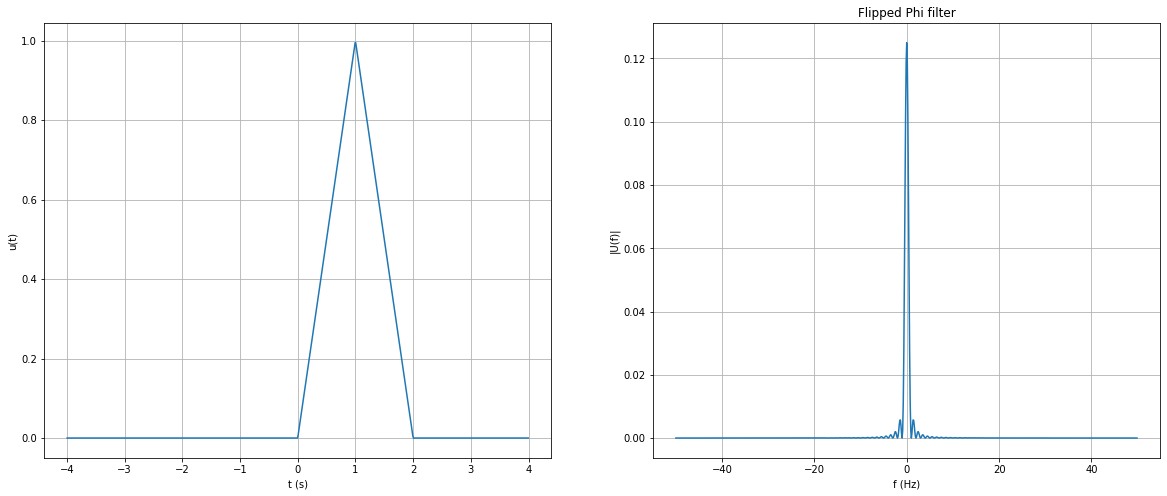

In [38]:
iaf_fri.plotFilter()

In [39]:
# print(f'The mean squared error of the signal is : {iaf_fri.computeMeanSquaredError()}')